# 목적
- 마케팅 전략 수립을 위한 고객 군집화
- 군집별 고객의 특성 파악

In [1]:
# 기본 패키지 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

# 데이터 준비
- 출처
    - https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python
    - 원본 데이터셋의 컬럼명을 한글화 하였음
- 단위
    - 연간소득 : 천달러
    - 소비점수 : 1~100점

In [2]:
df = pd.read_csv("C:/Users/EL087/Desktop/MS_MachineLearning/data/쇼핑몰고객군집화.csv")
df.head()

,고객ID,성별,나이,연간소득,소비점수
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# 데이터프레임 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   고객ID    200 non-null    int64 
 1   성별      200 non-null    object
 2   나이      200 non-null    int64 
 3   연간소득    200 non-null    int64 
 4   소비점수    200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


# 데이터 탐색

## 성별

In [4]:
# 성별 빈도수 확인
df["성별"].value_counts()

성별
Female    112
Male       88
Name: count, dtype: int64

In [5]:
# 성별 비율 확인
df["성별"].value_counts()/df["성별"].shape[0]

성별
Female    0.56
Male      0.44
Name: count, dtype: float64

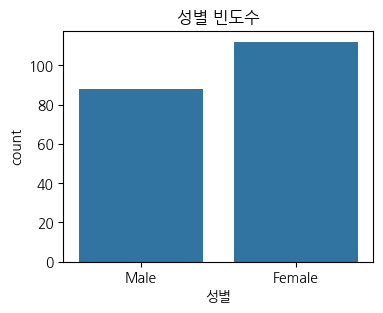

In [6]:
# 성별 빈도수 시각화
plt.figure(figsize=(4,3))
sns.countplot(x="성별", data=df)
plt.title("성별 빈도수");

## 나이

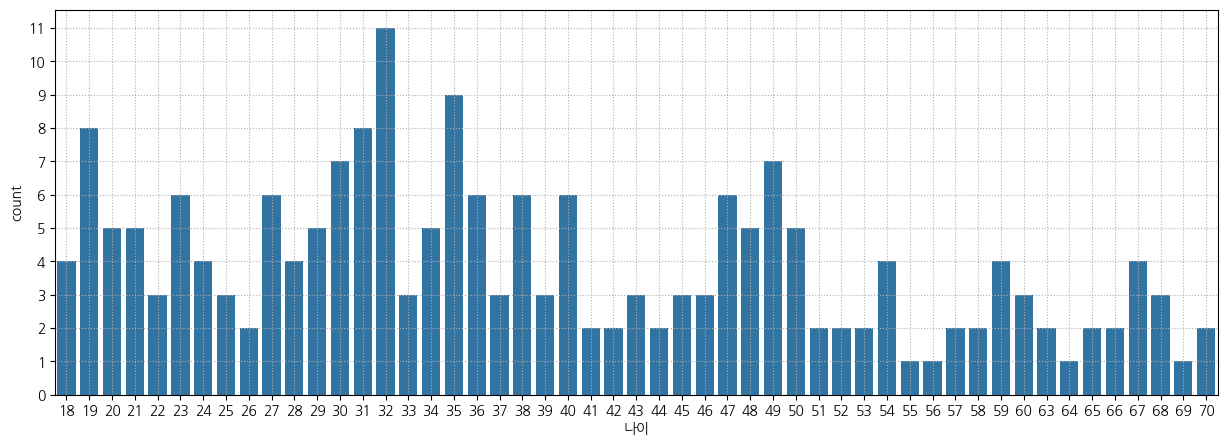

In [7]:
# 나이 빈도수 시각화
plt.figure(figsize=(15,5))
sns.countplot(x="나이", data=df)
plt.yticks(range(0,12))
plt.grid(ls=":")

In [8]:
# 나잇대별 빈도수
df['나잇대'] = (df["나이"] // 10) * 10

age_counts = df['나잇대'].value_counts().sort_index()
age_counts

나잇대
10    12
20    43
30    61
40    39
50    25
60    18
70     2
Name: count, dtype: int64

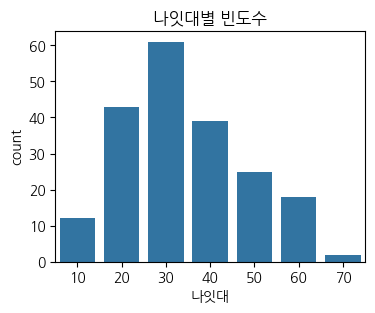

In [9]:
# 나잇대별 빈도수 시각화
plt.figure(figsize=(4,3))
sns.countplot(x="나잇대", data=df)
plt.title("나잇대별 빈도수");

## 나잇대별 성별

In [10]:
# 나잇대별 성별 빈도수
age_gender_counts = pd.crosstab(df['나잇대'], df['성별'])
print(age_gender_counts)

성별   Female  Male
나잇대              
10        3     9
20       26    17
30       37    24
40       24    15
50       14    11
60        8    10
70        0     2


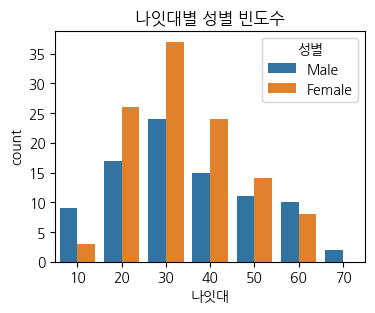

In [11]:
# 나잇대별 성별 빈도수 시각화
plt.figure(figsize=(4,3))
sns.countplot(x="나잇대", hue="성별", data=df)
plt.title("나잇대별 성별 빈도수");

## 연간소득

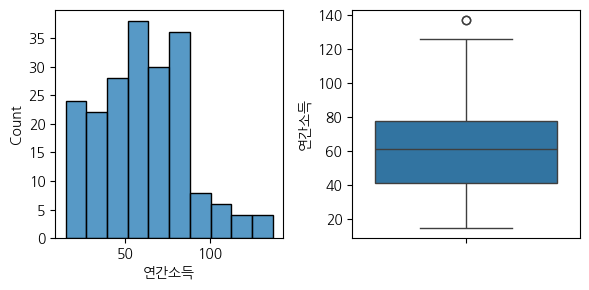

In [12]:
# ----------------
# 연간소득 분포 
# ----------------
fig, ax = plt.subplots(1,2,figsize=(6,3))
sns.histplot(x="연간소득", data=df, ax=ax[0])
sns.boxplot(y="연간소득", data=df, ax=ax[1])
plt.tight_layout()


## 소비점수

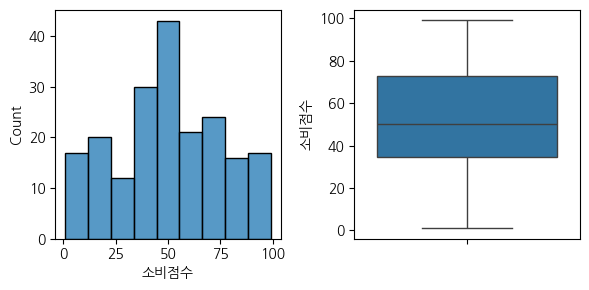

In [13]:
# ----------------
# 소비점수 분포 
# ----------------
fig, ax = plt.subplots(1,2,figsize=(6,3))
sns.histplot(x="소비점수", data=df, ax=ax[0])
sns.boxplot(y="소비점수", data=df, ax=ax[1])
plt.tight_layout()
